In [1]:
from DataLoader import DataLoader, DataConcate
from sklearn.preprocessing import MinMaxScaler
from DataFiltering import DataFiltering
from scipy import signal

from ecgdetectors import Detectors

import matplotlib.pyplot as plt
import numpy as np
import pickle
import gzip
import os

DATA_EXPORT_PATH = "./data/exported/30sec/"

ecg_data_filtering = DataFiltering(sampling_rate=250)
scaler = MinMaxScaler()
detecor = Detectors(250)

In [2]:
dataconcater = DataConcate()
dataloader = DataLoader()

data_list = os.listdir("./data/walking")
walking_data_list = ["./data/walking" + "/" + data for data in data_list]

data_list = os.listdir("./data/running")
running_data_list = ["./data/running" + "/" + data for data in data_list]

data_list = os.listdir("./data/sitting")
sitting_data_list = ["./data/sitting" + "/" + data for data in data_list]

In [3]:
walking_ecg_concate, walking_acc_concate = np.zeros((1)), np.zeros((1))
for file_path in walking_data_list:
    ecg, rsp, acc_x, acc_y, acc_z, heart_rate = dataloader.dataload(file_path)
    acc = np.sqrt(acc_x ** 2 + acc_y ** 2 + acc_z ** 2)

    walking_ecg_concate = np.concatenate((walking_ecg_concate, ecg), axis=0)
    walking_acc_concate = np.concatenate((walking_acc_concate, acc), axis=0)

walking_ecg_concate, walking_acc_concate = np.array(walking_ecg_concate[1:]), np.array(walking_acc_concate[1:])

print(np.shape(walking_ecg_concate))
print(np.shape(walking_acc_concate))

NON Mobile ./data/walking/ground_walking_test2.txt
NON Mobile ./data/walking/walking_test.txt
MOBILE ./data/walking/mobile_ground_walking_1.txt
MOBILE ./data/walking/mobile_ground_walking_2.txt
NON Mobile ./data/walking/ground_walking_test.txt
(696000,)
(69600,)


# Walking ECG & Accelerometer Signals

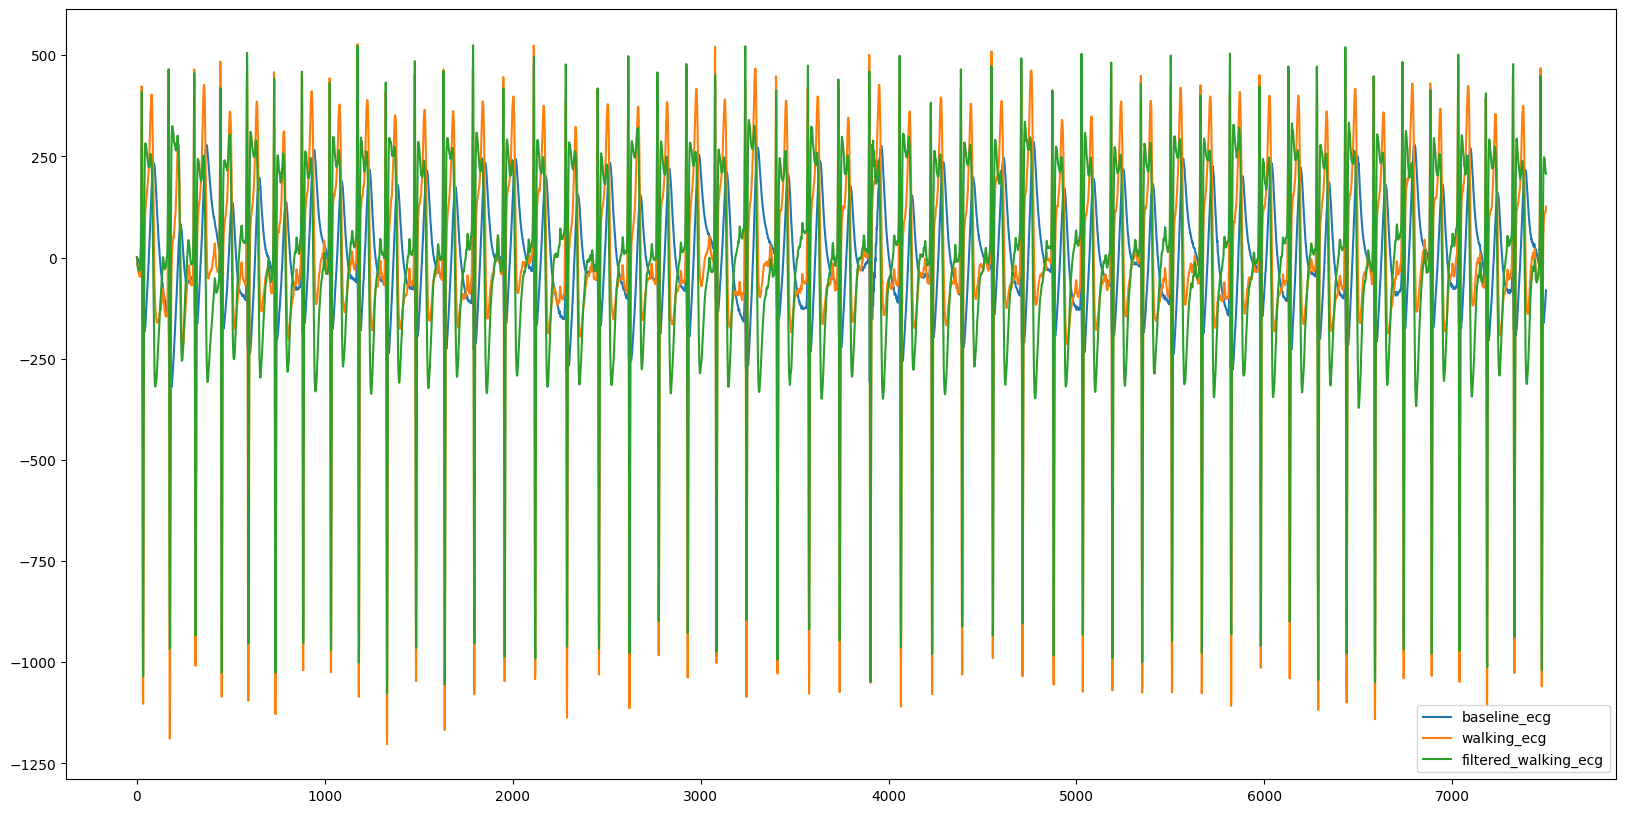

In [4]:
filtered_walking_ecg = ecg_data_filtering.lowpass_filter(walking_ecg_concate)
filtered_walking_ecg = ecg_data_filtering.highpass_filter(filtered_walking_ecg)
filtered_walking_ecg = ecg_data_filtering.bandstop_filter(filtered_walking_ecg)

baseline_ecg = walking_ecg_concate - filtered_walking_ecg

plt.figure(figsize=(20, 10))
plt.plot(baseline_ecg[:7500], label="baseline_ecg")
plt.plot(walking_ecg_concate[:7500], label="walking_ecg")
plt.plot(filtered_walking_ecg[:7500], label="filtered_walking_ecg")
plt.legend()
plt.show()

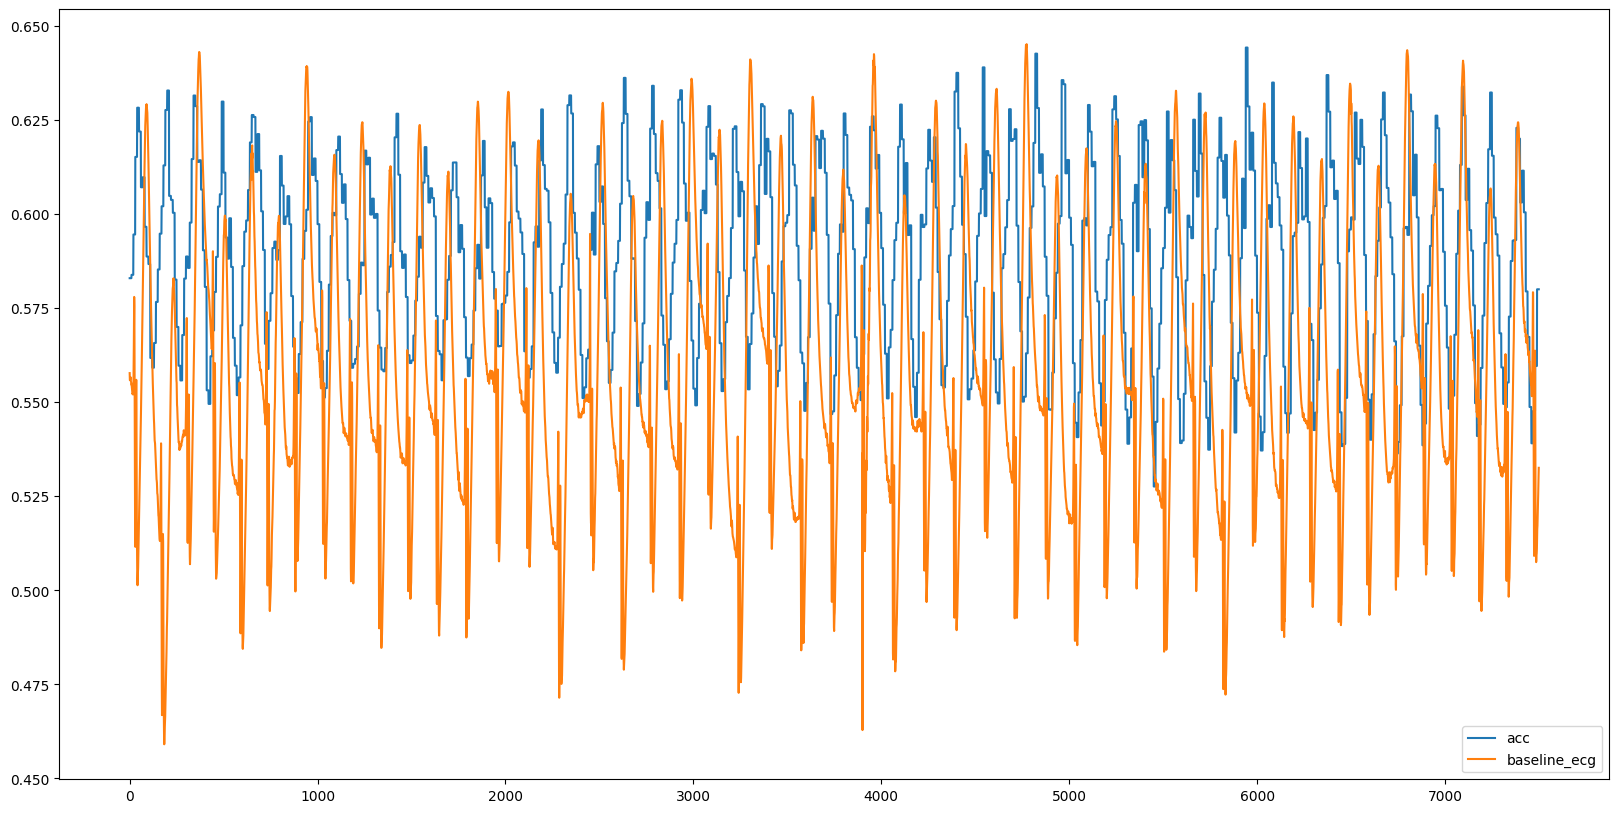

In [5]:
view_acc = walking_acc_concate
view_acc = np.repeat(view_acc, 10)
view_acc = scaler.fit_transform(view_acc.reshape(-1, 1))

view_ecg = baseline_ecg
view_ecg = scaler.fit_transform(view_ecg.reshape(-1, 1))

plt.figure(figsize=(20, 10))
plt.plot(view_acc[:7500] + 0.4, label="acc")
plt.plot(view_ecg[:7500], label="baseline_ecg")
plt.legend()
plt.show()

# Running ECG & Accelerometer

In [6]:
running_ecg_concate, running_acc_concate = np.zeros((1)), np.zeros((1))
for file_path in running_data_list:
    ecg, rsp, acc_x, acc_y, acc_z, heart_rate = dataloader.dataload(file_path)
    acc = np.sqrt(acc_x ** 2 + acc_y ** 2 + acc_z ** 2)

    running_ecg_concate = np.concatenate((running_ecg_concate, ecg), axis=0)
    running_acc_concate = np.concatenate((running_acc_concate, acc), axis=0)

running_ecg_concate, running_acc_concate = np.array(running_ecg_concate[1:]), np.array(running_acc_concate[1:])
print(np.shape(running_ecg_concate))

MOBILE ./data/running/mobile_ground_running_1.txt
NON Mobile ./data/running/machine_running_test2.txt
NON Mobile ./data/running/machine_running_test1.txt
(304900,)


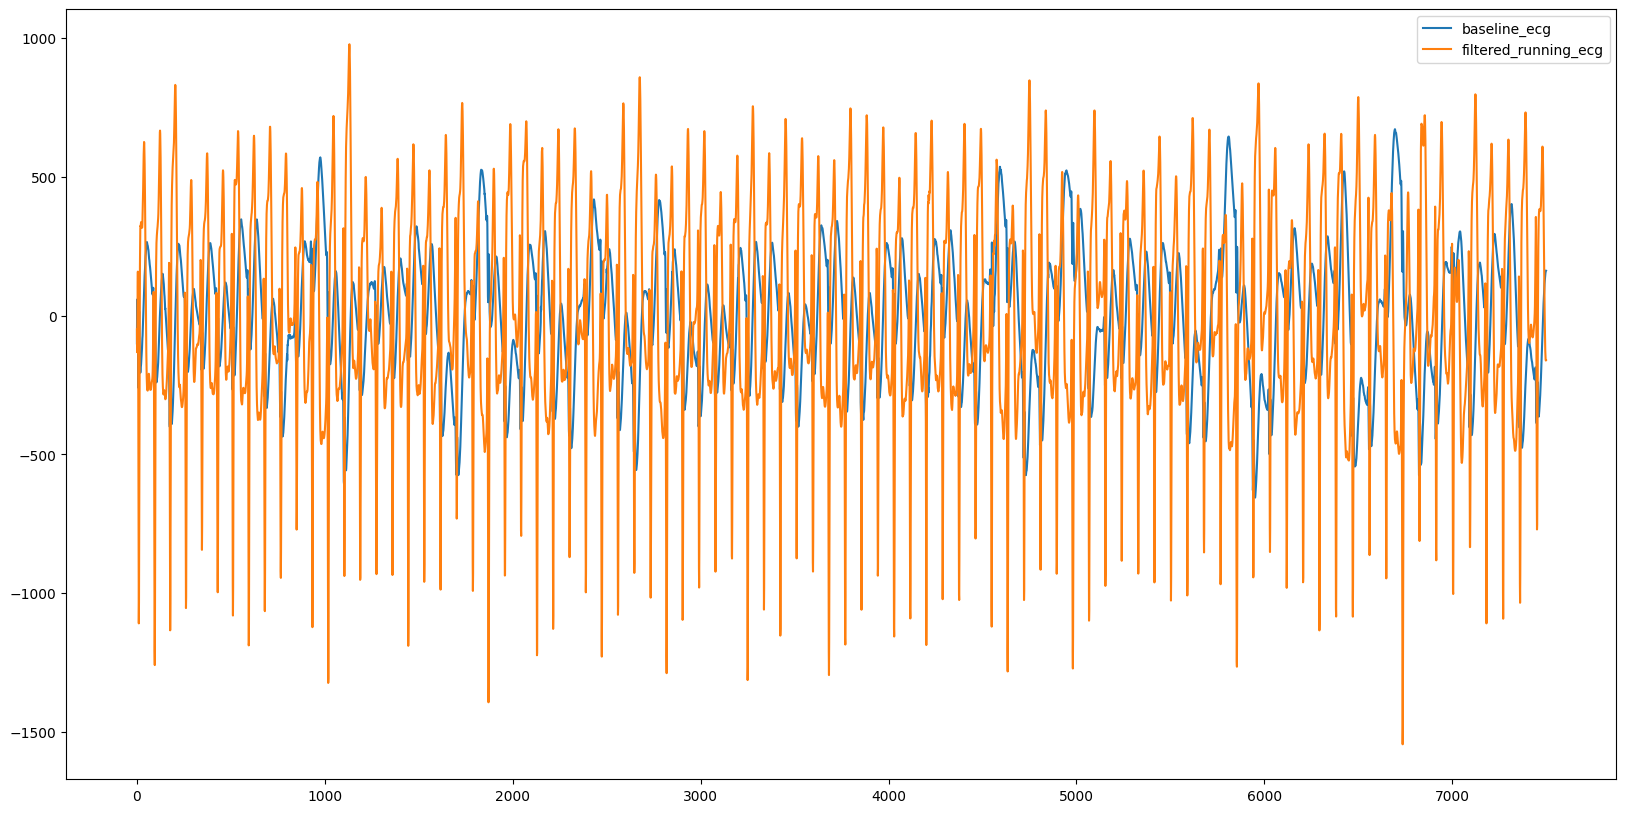

In [7]:
filtered_running_ecg = ecg_data_filtering.lowpass_filter(running_ecg_concate)
filtered_running_ecg = ecg_data_filtering.highpass_filter(filtered_running_ecg)
filtered_running_ecg = ecg_data_filtering.bandstop_filter(filtered_running_ecg)

baseline_ecg = running_ecg_concate - filtered_running_ecg

plt.figure(figsize=(20, 10))
plt.plot(baseline_ecg[:7500], label="baseline_ecg")
# plt.plot(running_ecg_concate[:7500], label="running_ecg")
plt.plot(filtered_running_ecg[:7500], label="filtered_running_ecg")
plt.legend()
plt.show()

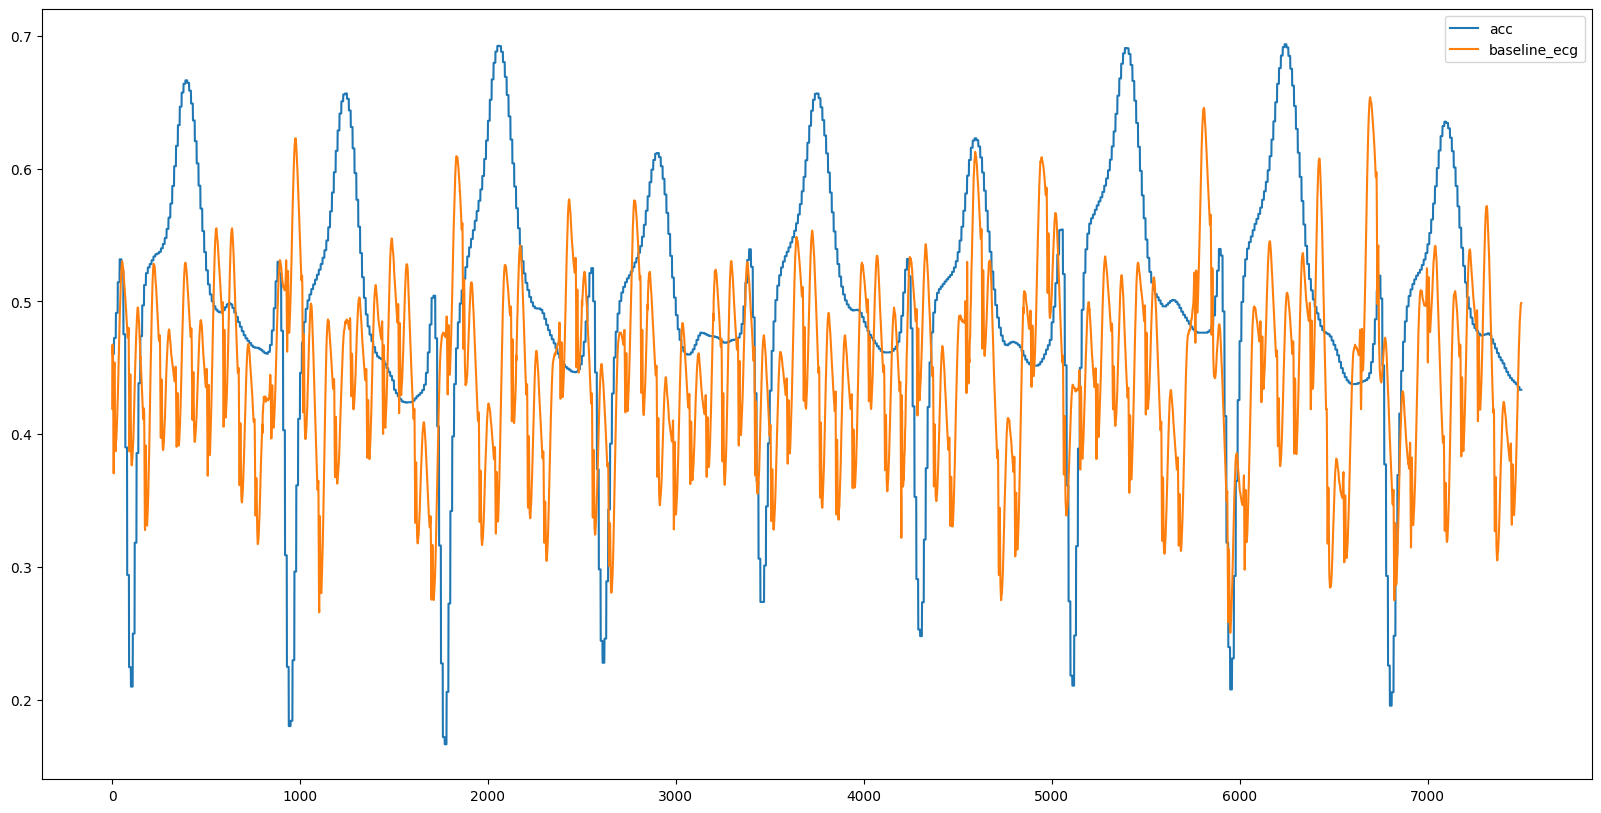

In [8]:
view_acc = running_ecg_concate
view_acc = np.repeat(view_acc, 10)
view_acc = scaler.fit_transform(view_acc.reshape(-1, 1))

view_ecg = baseline_ecg
view_ecg = scaler.fit_transform(view_ecg.reshape(-1, 1))

plt.figure(figsize=(20, 10))
plt.plot(view_acc[:7500], label="acc")
plt.plot(view_ecg[:7500], label="baseline_ecg")
plt.legend()
plt.show()